# <span style = "color: LightCoral;font-size:40px"> Advertising Data Project </span>

***

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad


### Import necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read "advertising.csv" and set it to dataframe variable

In [3]:
df=pd.read_csv('advertising.csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


### View the top 5 rows

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### View info of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


### View the basic statistical information about the data

In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Check for null values

In [7]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

### View all the countries in our data

In [8]:
df['Country'].unique()

array(['Tunisia', 'Nauru', 'San Marino', 'Italy', 'Iceland', 'Norway',
       'Myanmar', 'Australia', 'Grenada', 'Ghana', 'Qatar', 'Burundi',
       'Egypt', 'Bosnia and Herzegovina', 'Barbados', 'Spain',
       'Palestinian Territory', 'Afghanistan',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Russian Federation', 'Cameroon', 'Korea', 'Tokelau', 'Monaco',
       'Tuvalu', 'Greece', 'British Virgin Islands',
       'Bouvet Island (Bouvetoya)', 'Peru', 'Aruba', 'Maldives',
       'Senegal', 'Dominica', 'Luxembourg', 'Montenegro', 'Ukraine',
       'Saint Helena', 'Liberia', 'Turkmenistan', 'Niger', 'Sri Lanka',
       'Trinidad and Tobago', 'United Kingdom', 'Guinea-Bissau',
       'Micronesia', 'Turkey', 'Croatia', 'Israel',
       'Svalbard & Jan Mayen Islands', 'Azerbaijan', 'Iran',
       'Saint Vincent and the Grenadines', 'Bulgaria', 'Christmas Island',
       'Canada', 'Rwanda', 'Turks and Caicos Islands', 'Norfolk Island',
       'Cook Islands', 'Guatem

### View all the unique values in 'Ad Topic Line'

In [9]:
df['Ad Topic Line'].unique()

array(['Cloned 5thgeneration orchestration',
       'Monitored national standardization',
       'Organic bottom-line service-desk',
       'Triple-buffered reciprocal time-frame',
       'Robust logistical utilization', 'Sharable client-driven software',
       'Enhanced dedicated support', 'Reactive local challenge',
       'Configurable coherent function',
       'Mandatory homogeneous architecture',
       'Centralized neutral neural-net',
       'Team-oriented grid-enabled Local Area Network',
       'Centralized content-based focus group',
       'Synergistic fresh-thinking array',
       'Grass-roots coherent extranet',
       'Persistent demand-driven interface',
       'Customizable multi-tasking website', 'Intuitive dynamic attitude',
       'Grass-roots solution-oriented conglomeration',
       'Advanced 24/7 productivity',
       'Object-based reciprocal knowledgebase',
       'Streamlined non-volatile analyzer',
       'Mandatory disintermediate utilization',
       'Futur

### View all the cities

In [10]:
df['City'].unique()

array(['Wrightburgh', 'West Jodi', 'Davidton', 'West Terrifurt',
       'South Manuel', 'Jamieberg', 'Brandonstad', 'Port Jefferybury',
       'West Colin', 'Ramirezton', 'West Brandonton', 'East Theresashire',
       'West Katiefurt', 'North Tara', 'West William', 'New Travistown',
       'West Dylanberg', 'Pruittmouth', 'Jessicastad', 'Millertown',
       'Port Jacqueline', 'Lake Nicole', 'South John', 'Pamelamouth',
       'Harperborough', 'Port Danielleberg', 'West Jeremyside',
       'South Cathyfurt', 'Palmerside', 'West Guybury', 'Phelpschester',
       'Lake Melindamouth', 'North Richardburgh', 'Port Cassie',
       'New Thomas', 'Johnstad', 'West Aprilport', 'Kellytown',
       'Charlesport', 'Millerchester', 'Mackenziemouth', 'Zacharystad',
       'North Joshua', 'Bowenview', 'Jamesberg', 'Lake Cassandraport',
       'New Sharon', 'Johnport', 'Hamiltonfort', 'West Christopher',
       'Hollandberg', 'Odomville', 'East Samanthashire', 'South Lauraton',
       'Amandahaven', 'T

In [11]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [12]:
df.drop(columns=['Country','Ad Topic Line','City'],inplace=True)

### Change datatype of 'Timestamp' column to datetime format

In [13]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Male                      1000 non-null   int64         
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 54.8 KB


### Create a new column called months by fetching month data from Timestamp

In [14]:
df['Month']=df['Timestamp'].dt.month
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Month
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,3
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,4
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,3
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,1
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,6
...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,2016-02-11 21:49:00,1,2
996,51.30,45,67782.17,134.42,1,2016-04-22 02:07:01,1,4
997,51.63,51,42415.72,120.37,1,2016-02-01 17:24:57,1,2
998,55.55,19,41920.79,187.95,0,2016-03-24 02:35:54,0,3


### Create a new column called Year by fetching year from Timestamp

In [15]:
df['Year']=df['Timestamp'].dt.year
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Month,Year
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,3,2016
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,4,2016
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,3,2016
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,1,2016
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,6,2016
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,2016-02-11 21:49:00,1,2,2016
996,51.30,45,67782.17,134.42,1,2016-04-22 02:07:01,1,4,2016
997,51.63,51,42415.72,120.37,1,2016-02-01 17:24:57,1,2,2016
998,55.55,19,41920.79,187.95,0,2016-03-24 02:35:54,0,3,2016


### Create an new column called Date by fetching day from Timestamp

In [16]:
df['Date']=df['Timestamp'].dt.day
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Month,Year,Date
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,3,2016,27
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,4,2016,4
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,3,2016,13
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,1,2016,10
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,6,2016,3
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,2016-02-11 21:49:00,1,2,2016,11
996,51.30,45,67782.17,134.42,1,2016-04-22 02:07:01,1,4,2016,22
997,51.63,51,42415.72,120.37,1,2016-02-01 17:24:57,1,2,2016,1
998,55.55,19,41920.79,187.95,0,2016-03-24 02:35:54,0,3,2016,24


### Create a new column called Hour by fetching hour from Timestamp

In [17]:
df['Hour']=df['Timestamp'].dt.hour
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Month,Year,Date,Hour
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,3,2016,27,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,4,2016,4,1
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,3,2016,13,20
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,1,2016,10,2
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,6,2016,3,3
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,2016-02-11 21:49:00,1,2,2016,11,21
996,51.30,45,67782.17,134.42,1,2016-04-22 02:07:01,1,4,2016,22,2
997,51.63,51,42415.72,120.37,1,2016-02-01 17:24:57,1,2,2016,1,17
998,55.55,19,41920.79,187.95,0,2016-03-24 02:35:54,0,3,2016,24,2


## <span style = "color: orange" > Visualization </span>

### Create a histplotof age

<Axes: xlabel='Age', ylabel='Count'>

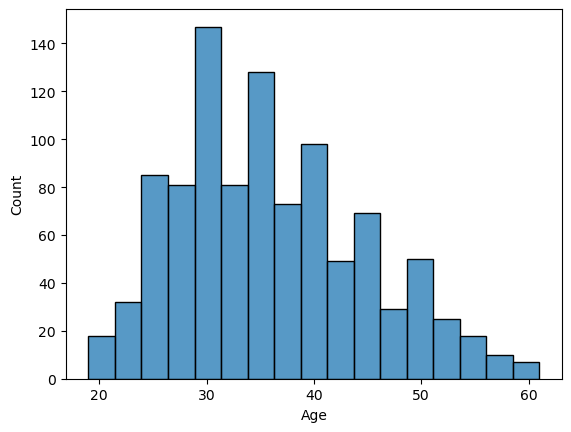

In [18]:
sns.histplot(df['Age'])

### Create a jointplot of Area Income vs Age

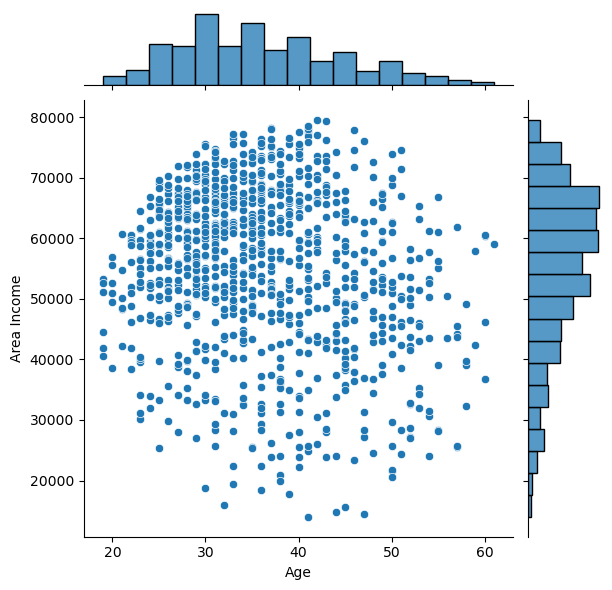

In [19]:
sns.jointplot(x='Age',y='Area Income',data=df)

### Create a jointplot showing the kde distributions of Daily Time spend on site vs Age

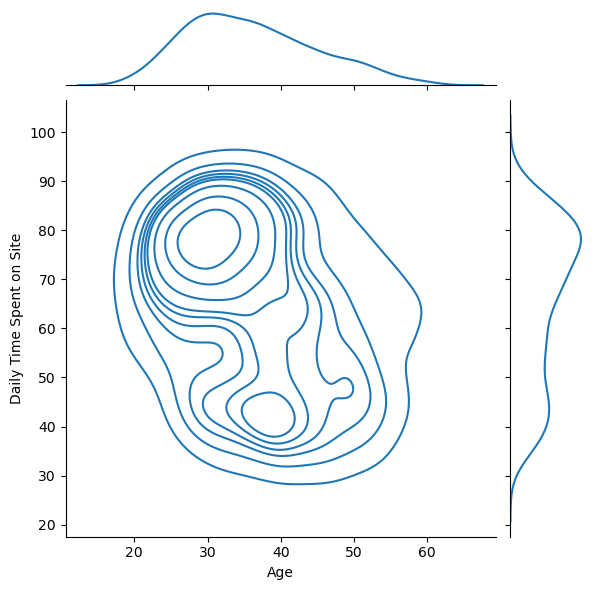

In [20]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,kind='kde')

### Create a countplot to show Hour (See which hour the users are most active)

<Axes: xlabel='Hour', ylabel='count'>

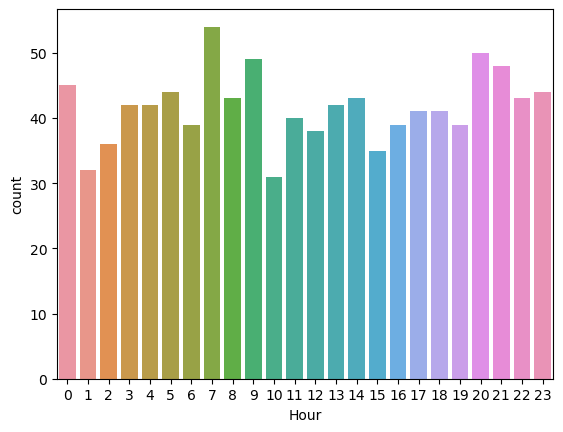

In [21]:
sns.countplot(x=df['Hour'])

### Create a countplot to show which day user are the most active

<Axes: xlabel='Date', ylabel='count'>

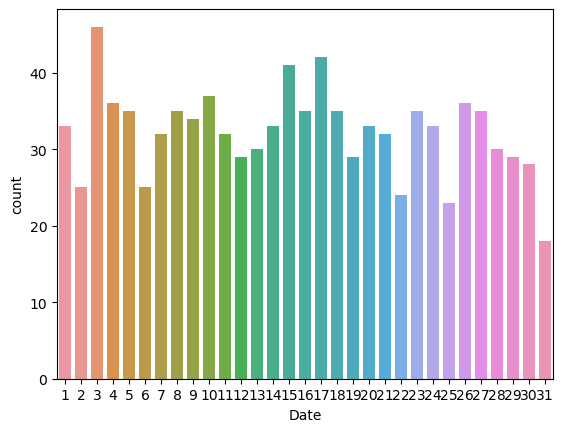

In [22]:
sns.countplot(x=df['Date'])

### Create a heatmap to visualize the correlation between columns

<Axes: >

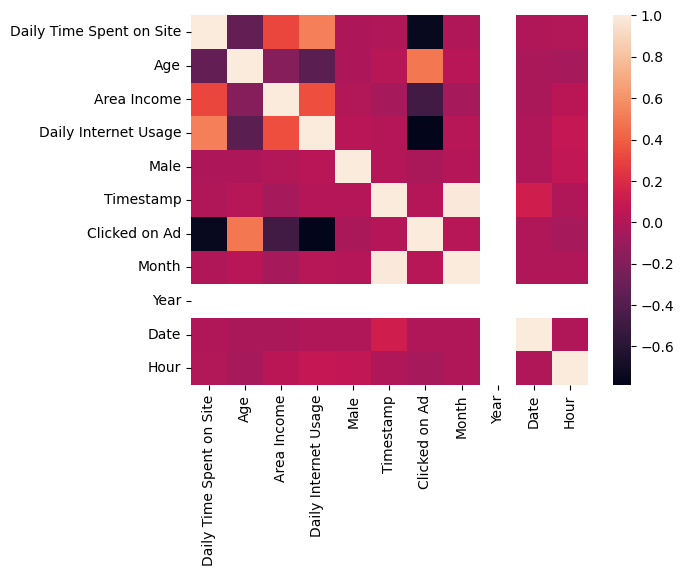

In [23]:
sns.heatmap(df.corr())

### Split the data into features and target variables (X and y)

In [24]:
X=df.drop(columns=['Clicked on Ad','Timestamp'])


In [25]:
y=df['Clicked on Ad']

### Standardize the data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Year,Date,Hour
0,0.249267,-0.114905,0.509691,1.734030,-0.962695,-0.424193,0.0,1.319174,-1.675896
1,0.961132,-0.570425,1.002530,0.313805,1.038750,0.095015,0.0,-1.315508,-1.532166
2,0.282083,-1.139826,0.356949,1.287589,-0.962695,-0.424193,0.0,-0.284546,1.198711
3,0.577432,-0.798185,-0.014456,1.501580,1.038750,-1.462610,0.0,-0.628200,-1.388436
4,0.212664,-0.114905,1.408868,1.038731,-0.962695,1.133432,0.0,-1.430060,-1.244705


### Split the data into training and testing set

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

### Create a Logistic Regression model and train it

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

### Check the accuracy of our model

In [29]:
model.score(X_train,y_train)

0.962

### Make prediction using the X_test

In [30]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,

### Check how accurate the prediction is:

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.974

### Check the confusion matrix

In [32]:
confusion_matrix(y_test,y_pred)

array([[246,   3],
       [ 10, 241]], dtype=int64)

### Plot the confusion matrix on a heatmap

<Axes: >

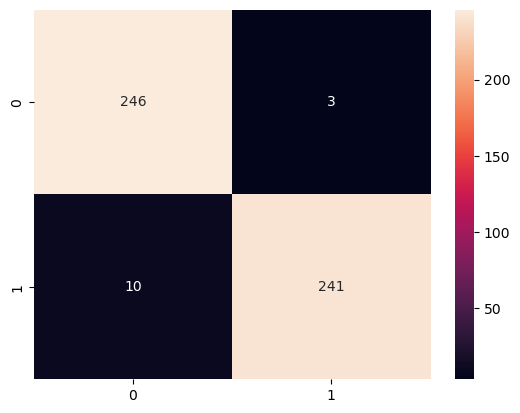

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Create a classification report for the model

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       249
           1       0.99      0.96      0.97       251

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



***